In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("AB_NYC_2019.csv", encoding='LATIN-1')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
for i in df.columns :
    if df[i].dtype == 'O' :
        df[i] = df[i].str.lower()

In [8]:
df.drop_duplicates(inplace=True)

df.shape

(48895, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df['room_type'].value_counts()

room_type
entire home/apt    25409
private room       22326
shared room         1160
Name: count, dtype: int64

In [12]:
df.loc[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,peter,manhattan,battery park city,40.71239,-74.01620,entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,anna,manhattan,east village,40.73215,-73.98821,entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,jesse,manhattan,greenwich village,40.73473,-73.99244,entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,michaã«l,manhattan,nolita,40.72046,-73.99550,entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,lucie,brooklyn,williamsburg,40.71370,-73.94378,private room,150,1,0,NaN,NaN,1,0


In [13]:
df = df.dropna(subset = 'name')

In [14]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df.drop(['id', 'last_review'], axis = 1, inplace = True)

In [16]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355
2,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaN,1,365
3,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,4.64,1,194
4,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,0.10,1,0


In [18]:
df.isnull().sum()

name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

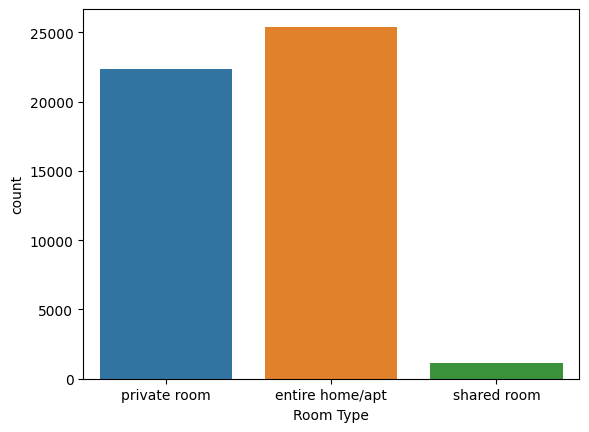

In [19]:
sns.countplot(x = 'room_type', data = df)
plt.xlabel('Room Type')
plt.show()


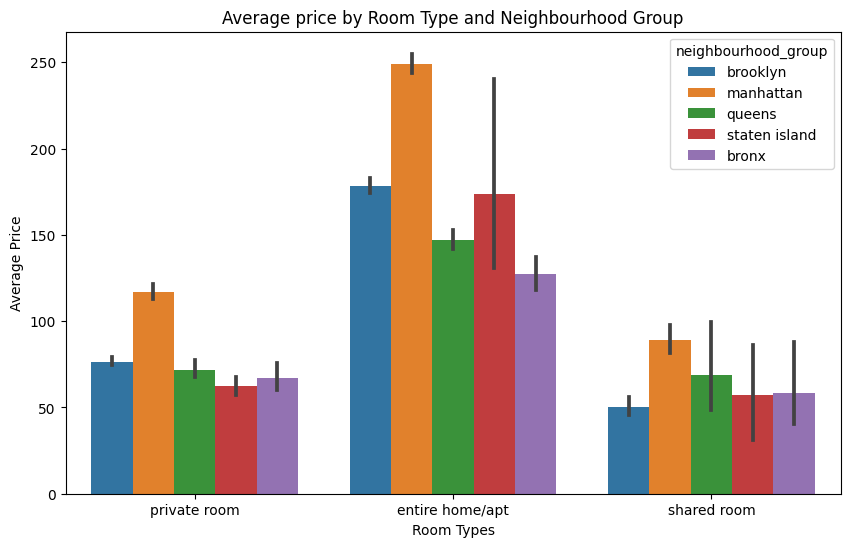

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['room_type'], y = df['price'], hue = df['neighbourhood_group'])
plt.title('Average price by Room Type and Neighbourhood Group')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.show()

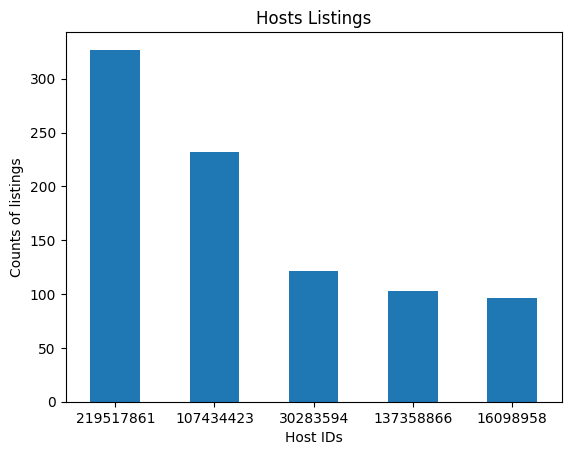

In [21]:
df.groupby('host_id')['host_id'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Hosts Listings')
plt.xlabel('Host IDs')
plt.ylabel('Counts of listings')
plt.xticks(rotation = 0)
plt.show()

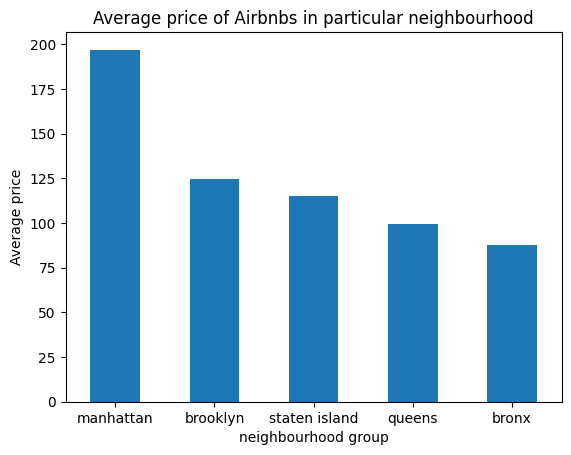

In [22]:
df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Average price of Airbnbs in particular neighbourhood')
plt.xlabel('neighbourhood group')
plt.ylabel('Average price')
plt.xticks(rotation = 0)
plt.show()

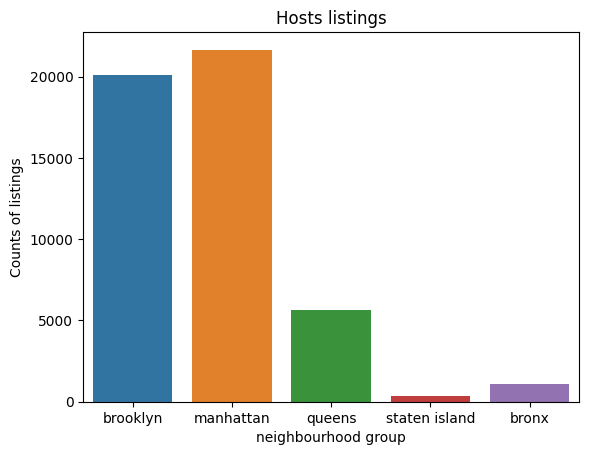

In [23]:
sns.countplot(x = df['neighbourhood_group'])
plt.title('Hosts listings')
plt.xlabel('neighbourhood group')
plt.ylabel('Counts of listings')
plt.xticks(rotation = 0)
plt.show()

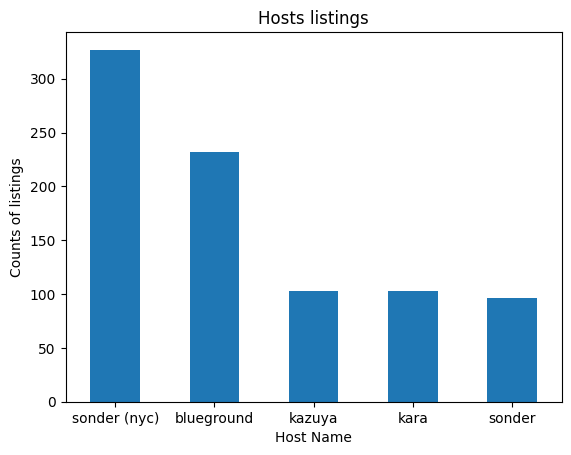

In [24]:
df.groupby('host_name')['calculated_host_listings_count'].mean().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Hosts listings')
plt.xlabel('Host Name')
plt.ylabel('Counts of listings') 
plt.xticks(rotation = 0)
plt.show()


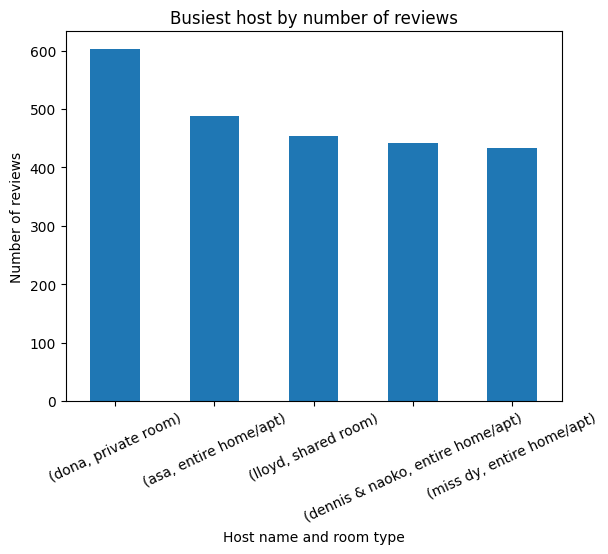

In [25]:
df.groupby(['host_name','room_type'])['number_of_reviews'].mean().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Busiest host by number of reviews')
plt.xlabel('Host name and room type')
plt.ylabel('Number of reviews')
plt.xticks(rotation = 25)
plt.show()

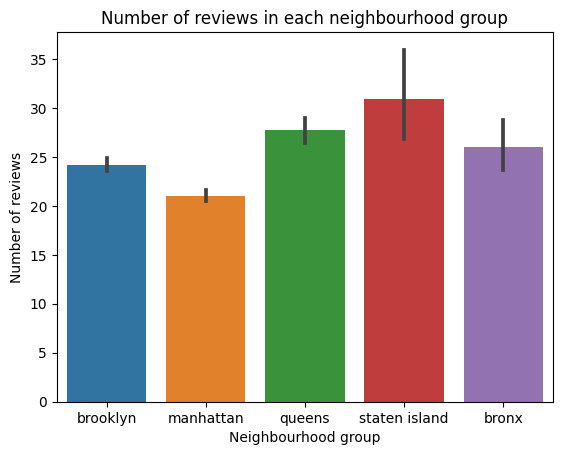

In [26]:
sns.barplot(x = df['neighbourhood_group'], y = df['number_of_reviews'] )
plt.title('Number of reviews in each neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of reviews')
plt.xticks(rotation = 0)
plt.show()

In [27]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

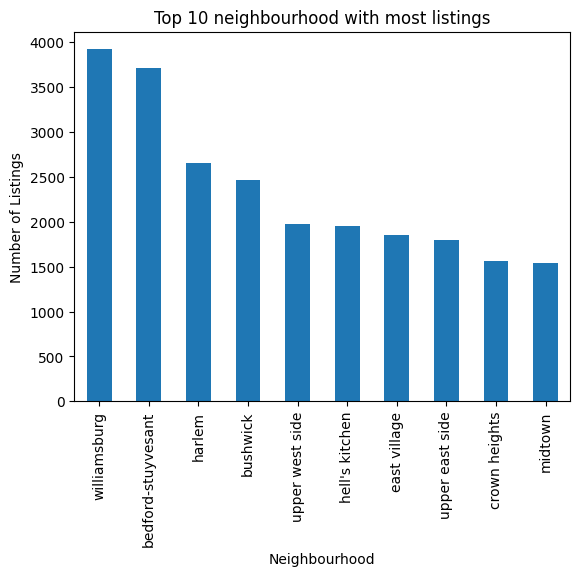

In [28]:
df.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 neighbourhood with most listings')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 90)
plt.show()

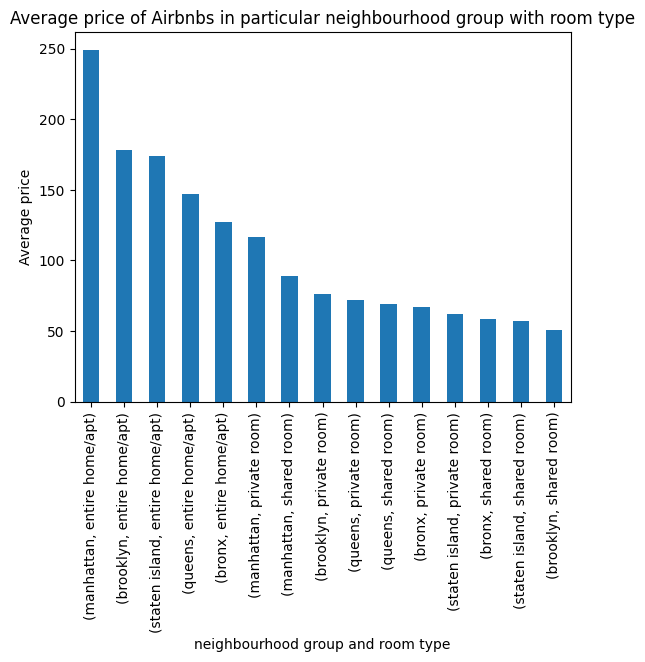

In [29]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Average price of Airbnbs in particular neighbourhood group with room type')
plt.xlabel('neighbourhood group and room type')
plt.ylabel('Average price')
plt.xticks(rotation = 90)
plt.show()


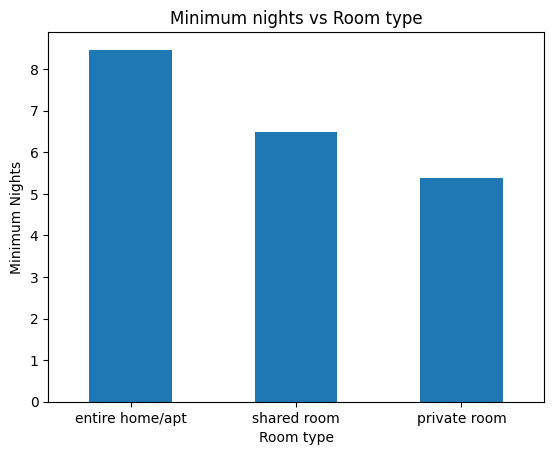

In [30]:
df.groupby('room_type')['minimum_nights'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Minimum nights vs Room type')
plt.xlabel('Room type')
plt.ylabel('Minimum Nights')
plt.xticks(rotation = 0)
plt.show()

In [31]:
df.replace(df['longitude']== 'nan', 0).head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355
2,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaN,1,365
3,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,4.64,1,194
4,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,0.10,1,0


In [32]:
df.replace(df['latitude']== 'nan', 0).head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355
2,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaN,1,365
3,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,4.64,1,194
4,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,0.10,1,0


In [33]:
df.isnull().sum()

name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

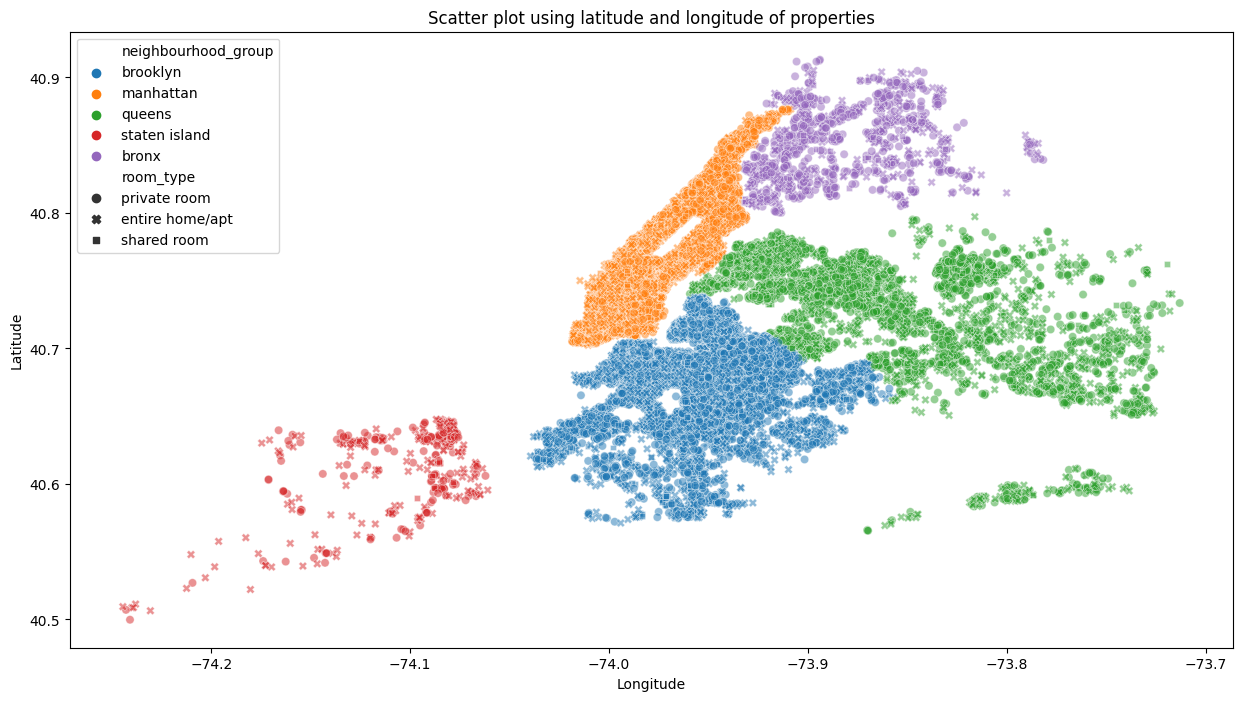

In [34]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue = df['neighbourhood_group'], alpha = 0.5, style = df['room_type'])
plt.title('Scatter plot using latitude and longitude of properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()